# В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

Я выбрал распределение Лапласа.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
%matplotlib inline

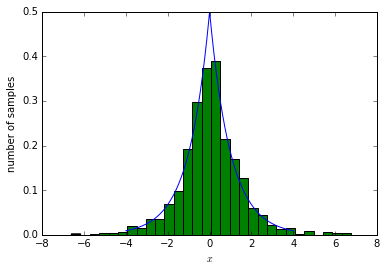

In [12]:
a = 1.0
b = 0.0
ld = stat.laplace(loc=b, scale=a)
x = np.linspace(-4, 4, 1000)
plt.plot(x, stat.laplace.pdf(x))

sample = ld.rvs(size=1000)
plt.hist(sample, normed=True, bins=30)
plt.ylabel('number of samples')
plt.xlabel('$x$')

$$ Мат. ожидание = \beta $$
$$ f(\beta) = \alpha/2 $$
$$ Дисперсия = 2 / (\alpha ^ 2) $$
Вики:
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0



Теперь нужно посчитать выборочное среднее для каждой выборки.

В задании говориться, что надо сделать 1000 выборок объема n, 
а модератор в обсуждении сказал, что надо делать n выборок объема 1000.
Сначала сделал как сказал модератор, но эта версия по заданию.

In [13]:
sizes = [5, 10, 30, 45]
samples = []
for i in sizes:
    samples.append(stat.laplace.rvs(size=[1000, i]))

# Находим средние по выборке из семпла.
means_of_sample = []
for sample in samples:
    # Средние для гистограммы.
    means = []
    for i in sample:
        means.append(np.mean(i))
    means_of_sample.append(means)

Посчитаем мат. ожидание и дисперсию

In [14]:
mean = b
dispersion = 2 / ((2 * stat.laplace.pdf(mean)) ** 2)
print("mean: " + str(mean) 
      + "\ndispersion: " + str(dispersion))

mean: 0.0
dispersion: 2.0


Гистограмма для 5 средних

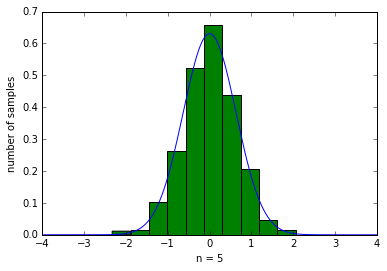

In [17]:
norm_rv = stat.norm(mean, np.sqrt(dispersion / sizes[0]))
x = np.linspace(-4, 4, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.hist(means_of_sample[0], normed=True)
plt.ylabel('number of samples')
plt.xlabel('n = 5')

Гистограмма для 10 средних

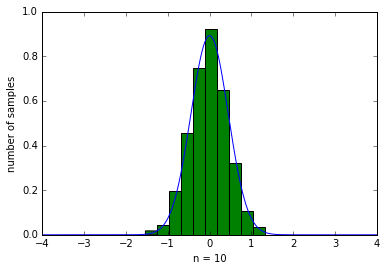

In [19]:
norm_rv = stat.norm(mean, np.sqrt(dispersion / sizes[1]))
x = np.linspace(-4, 4, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.hist(means_of_sample[1], normed=True)
plt.ylabel('number of samples')
plt.xlabel('n = 10')

Гистограмма для 30 средних

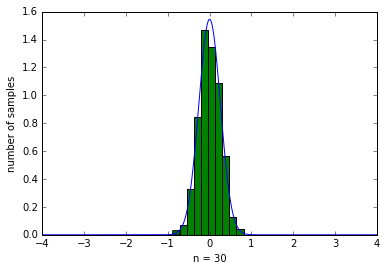

In [20]:
norm_rv = stat.norm(mean, np.sqrt(dispersion / sizes[2]))
x = np.linspace(-4, 4, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.hist(means_of_sample[2], normed=True)
plt.ylabel('number of samples')
plt.xlabel('n = 30')

Гистограмма для 45 средних

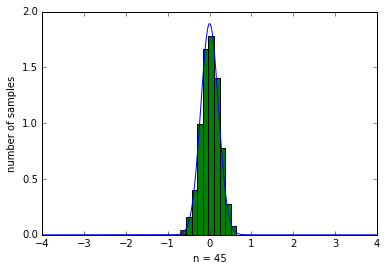

In [22]:
norm_rv = stat.norm(mean, np.sqrt(dispersion / sizes[3]))
x = np.linspace(-4, 4, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.hist(means_of_sample[3], normed=True)
plt.ylabel('number of samples')
plt.xlabel('n = 45')

# Вывод
С увеличением объема выборки(n) гистограмма становится все больше похожа на нормальное распределение.